In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Train data shape: (1080, 1)
Test data shape: (121, 1)


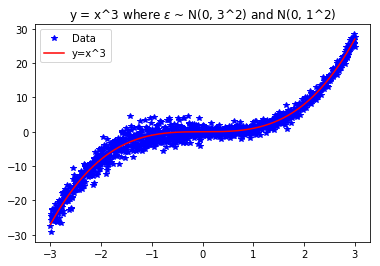

In [323]:
test_ratio = 0.1

data_range = 3
data_step = 0.005
data_sigma1 = 2
data_sigma2 = 1
num_data = 1

def pow_fun(x):
    return np.power(x, 3)

data_x = np.arange(-data_range, data_range + data_step, data_step)
data_x = np.reshape(data_x, [data_x.shape[0], 1])

data_y = np.zeros([data_x.shape[0], 1])
data_y_true = np.zeros([data_x.shape[0], 1])

for i in range(data_x.shape[0]):
    if (data_x[i,0] < 0): 
        data_y[i, 0] = pow_fun(data_x[i,0]) + np.random.normal(0, data_sigma1)
    else:
        data_y[i, 0] = pow_fun(data_x[i,0]) + np.random.normal(0, data_sigma2)
        
    data_y_true[i, 0] = pow_fun(data_x[i,0])
    
num_train_data = int(data_x.shape[0] * (1 - test_ratio))
num_test_data  = data_x.shape[0] - num_train_data

train_x = data_x[:num_train_data, :]
train_y = data_y[:num_train_data, :]
test_x  = data_x[num_train_data:, :]
test_y  = data_y[num_train_data:, :]

print("Train data shape: " + str(train_x.shape))
print("Test data shape: " + str(test_x.shape))

plt.plot(data_x, data_y, 'b*')
plt.plot(data_x, data_y_true, 'r')
plt.legend(['Data', 'y=x^3'], loc = 'best')
plt.title('y = x^3 where $\epsilon$ ~ N(0, 3^2) and N(0, 1^2)')
plt.show()

In [324]:
import tensorflow as tf
from keras import backend as K
from keras.layers import Input, Dense, Layer, Dropout
from keras.models import Model
from keras.initializers import glorot_normal
import numpy as np

def custom_loss(sigma):
    def gaussian_loss(y_true, y_pred):
        return tf.reduce_mean(0.5*tf.log(sigma) + 0.5*tf.div(tf.square(y_true - y_pred), sigma)) + 1e-6
    return gaussian_loss

class GaussianLayer(Layer):

    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(GaussianLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel_1 = self.add_weight(name='kernel_1', 
                                      shape=(30, self.output_dim),
                                      initializer=glorot_normal(),
                                      trainable=True)
        self.kernel_2 = self.add_weight(name='kernel_2', 
                                      shape=(30, self.output_dim),
                                      initializer=glorot_normal(),
                                      trainable=True)
        self.bias_1 = self.add_weight(name='bias_1',
                                    shape=(self.output_dim, ),
                                    initializer=glorot_normal(),
                                    trainable=True)
        self.bias_2 = self.add_weight(name='bias_2',
                                    shape=(self.output_dim, ),
                                    initializer=glorot_normal(),
                                    trainable=True)
        super(GaussianLayer, self).build(input_shape) 

    def call(self, x):
        output_mu  = K.dot(x, self.kernel_1) + self.bias_1
        output_sig = K.dot(x, self.kernel_2) + self.bias_2
        output_sig_pos = K.log(1 + K.exp(output_sig)) + 1e-06  
        return [output_mu, output_sig_pos]

    def compute_output_shape(self, input_shape):
        return [(input_shape[0], self.output_dim), (input_shape[0], self.output_dim)]

inputs = Input(shape=(1,))
x = Dense(10, activation='relu')(inputs)
x = Dense(6, activation='relu')(x)
x = Dense(30, activation='relu')(x)
mu, sigma = GaussianLayer(1, name='main_output')(x)

model = Model(inputs, mu)
model.compile(loss=custom_loss(sigma), optimizer='adam')
model.fit(train_x, train_y, epochs=400)

layer_name = 'main_output' # Where to extract the output from
get_intermediate = K.function(inputs=[model.input], outputs=model.get_layer(layer_name).output)

Epoch 1/400
1080/1080 [==============================] - 28s 26ms/step - loss: 49.2479
Epoch 2/400
1080/1080 [==============================] - 0s 187us/step - loss: 40.0115
Epoch 3/400
1080/1080 [==============================] - 0s 199us/step - loss: 28.5656
Epoch 4/400
1080/1080 [==============================] - 0s 194us/step - loss: 18.5135
Epoch 5/400
1080/1080 [==============================] - 0s 195us/step - loss: 12.4379
Epoch 6/400
1080/1080 [==============================] - 0s 204us/step - loss: 9.0989
Epoch 7/400
1080/1080 [==============================] - 0s 187us/step - loss: 7.1297
Epoch 8/400
1080/1080 [==============================] - 0s 212us/step - loss: 5.8013
Epoch 9/400
1080/1080 [==============================] - 0s 204us/step - loss: 4.7706
Epoch 10/400
1080/1080 [==============================] - 0s 231us/step - loss: 3.9393
Epoch 11/400
1080/1080 [==============================] - 0s 207us/step - loss: 3.3448
Epoch 12/400
1080/1080 [=======================

Epoch 95/400
1080/1080 [==============================] - 0s 244us/step - loss: 0.9792
Epoch 96/400
1080/1080 [==============================] - 0s 230us/step - loss: 0.9778
Epoch 97/400
1080/1080 [==============================] - 0s 244us/step - loss: 0.9760
Epoch 98/400
1080/1080 [==============================] - 0s 221us/step - loss: 0.9739
Epoch 99/400
1080/1080 [==============================] - 0s 218us/step - loss: 0.9836
Epoch 100/400
1080/1080 [==============================] - 0s 239us/step - loss: 0.9755
Epoch 101/400
1080/1080 [==============================] - 0s 226us/step - loss: 0.9696
Epoch 102/400
1080/1080 [==============================] - 0s 221us/step - loss: 0.9649
Epoch 103/400
1080/1080 [==============================] - 0s 235us/step - loss: 0.9618
Epoch 104/400
1080/1080 [==============================] - 0s 219us/step - loss: 0.9644
Epoch 105/400
1080/1080 [==============================] - 0s 228us/step - loss: 0.9681
Epoch 106/400
1080/1080 [============

Epoch 188/400
1080/1080 [==============================] - 0s 201us/step - loss: 0.9143
Epoch 189/400
1080/1080 [==============================] - 0s 231us/step - loss: 0.9110
Epoch 190/400
1080/1080 [==============================] - 0s 226us/step - loss: 0.9087
Epoch 191/400
1080/1080 [==============================] - 0s 225us/step - loss: 0.9061
Epoch 192/400
1080/1080 [==============================] - 0s 229us/step - loss: 0.9106
Epoch 193/400
1080/1080 [==============================] - 0s 224us/step - loss: 0.9102
Epoch 194/400
1080/1080 [==============================] - 0s 199us/step - loss: 0.9071
Epoch 195/400
1080/1080 [==============================] - 0s 220us/step - loss: 0.9047
Epoch 196/400
1080/1080 [==============================] - 0s 195us/step - loss: 0.9148
Epoch 197/400
1080/1080 [==============================] - 0s 231us/step - loss: 0.9114
Epoch 198/400
1080/1080 [==============================] - 0s 283us/step - loss: 0.9123
Epoch 199/400
1080/1080 [=======

1080/1080 [==============================] - 0s 184us/step - loss: 0.9053
Epoch 282/400
1080/1080 [==============================] - 0s 186us/step - loss: 0.9048
Epoch 283/400
1080/1080 [==============================] - 0s 180us/step - loss: 0.9023
Epoch 284/400
1080/1080 [==============================] - 0s 185us/step - loss: 0.9174
Epoch 285/400
1080/1080 [==============================] - 0s 185us/step - loss: 0.8960
Epoch 286/400
1080/1080 [==============================] - 0s 180us/step - loss: 0.9084
Epoch 287/400
1080/1080 [==============================] - 0s 183us/step - loss: 0.9038
Epoch 288/400
1080/1080 [==============================] - 0s 184us/step - loss: 0.9004
Epoch 289/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.9037
Epoch 290/400
1080/1080 [==============================] - 0s 192us/step - loss: 0.9035
Epoch 291/400
1080/1080 [==============================] - 0s 158us/step - loss: 0.9028
Epoch 292/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 182us/step - loss: 0.8952
Epoch 374/400
1080/1080 [==============================] - 0s 185us/step - loss: 0.9077
Epoch 375/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.9021
Epoch 376/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.8943
Epoch 377/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.8907
Epoch 378/400
1080/1080 [==============================] - 0s 184us/step - loss: 0.8989
Epoch 379/400
1080/1080 [==============================] - 0s 165us/step - loss: 0.8995
Epoch 380/400
1080/1080 [==============================] - 0s 196us/step - loss: 0.8983
Epoch 381/400
1080/1080 [==============================] - 0s 197us/step - loss: 0.8964
Epoch 382/400
1080/1080 [==============================] - 0s 173us/step - loss: 0.8929
Epoch 383/400
1080/1080 [==============================] - 0s 181us/step - loss: 0.9040
Epoch 384/400
1080/1080 [=====================

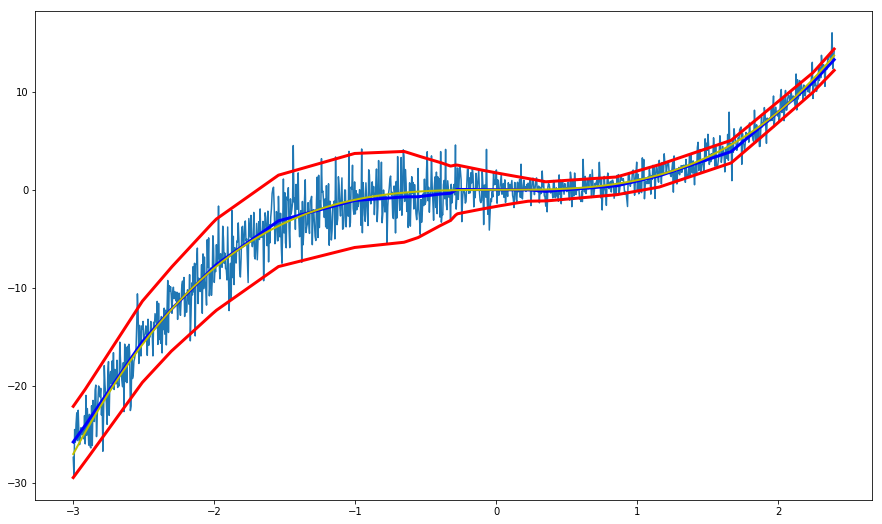

In [325]:
preds, sigmas = [], []
for j in range(len(train_x)):
    mu, sigma = get_intermediate([[train_x[j]]])
    preds.append(mu.reshape(1,)[0])
    sigmas.append(sigma.reshape(1,)[0])

plt.figure(1, figsize=(15, 9))
plt.plot([i[0] for i in train_x], [i for i in train_y])
plt.plot([i[0] for i in train_x], [i for i in preds], 'b', linewidth=3)
upper = [i+k for i,k in zip(preds, sigmas)]
lower = [i-k for i,k in zip(preds, sigmas)]

plt.plot([i[0] for i in train_x], [i for i in upper], 'r', linewidth = 3)
plt.plot([i[0] for i in train_x], [i for i in lower], 'r', linewidth = 3)
plt.plot([i[0] for i in train_x], [pow_fun(i[0]) for i in train_x], 'y', linewidth = 2)

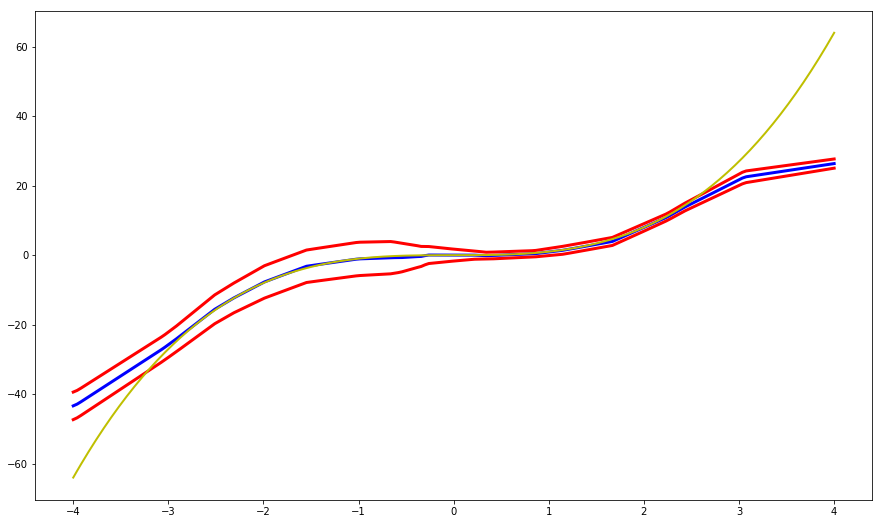

In [326]:
x_ax = np.linspace(-4, 4, num=200)
preds, sigmas = [], []
for j in range(len(x_ax)):
    
    mu, sigma = get_intermediate([[np.array([x_ax[j]])]])
    preds.append(mu.reshape(1,)[0])
    sigmas.append(sigma.reshape(1,)[0])

plt.figure(1, figsize=(15, 9))
plt.plot([i for i in x_ax], [i for i in preds], 'b', linewidth=3)
upper = [i+k for i,k in zip(preds, sigmas)]
lower = [i-k for i,k in zip(preds, sigmas)]

plt.plot([i for i in x_ax], [i for i in upper], 'r', linewidth = 3)
plt.plot([i for i in x_ax], [i for i in lower], 'r', linewidth = 3)
plt.plot([i for i in x_ax], [pow_fun(i) for i in x_ax], 'y', linewidth = 2)

In [327]:
# Experiment with multiple networks

def create_trained_network(train_x, train_y):
    inputs = Input(shape=(1,))
    x = Dense(10, activation='relu')(inputs)
    x = Dense(6, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    mu, sigma = GaussianLayer(1, name='main_output')(x)

    model = Model(inputs, mu)
    model.compile(loss=custom_loss(sigma), optimizer='adam')
    model.fit(train_x, train_y, epochs=400)

    layer_name = 'main_output' # Where to extract the output from
    get_intermediate = K.function(inputs=[model.input], outputs=model.get_layer(layer_name).output)
    return get_intermediate

prediction_fns = []
for i in range(10):
    prediction_fns.append(create_trained_network(train_x, train_y))

Epoch 1/400
1080/1080 [==============================] - 21s 19ms/step - loss: 25.1046
Epoch 2/400
1080/1080 [==============================] - 0s 172us/step - loss: 17.7819
Epoch 3/400
1080/1080 [==============================] - 0s 170us/step - loss: 11.9581
Epoch 4/400
1080/1080 [==============================] - 0s 162us/step - loss: 8.2437
Epoch 5/400
1080/1080 [==============================] - 0s 142us/step - loss: 6.0244
Epoch 6/400
1080/1080 [==============================] - 0s 142us/step - loss: 4.7082
Epoch 7/400
1080/1080 [==============================] - 0s 160us/step - loss: 3.8473
Epoch 8/400
1080/1080 [==============================] - 0s 169us/step - loss: 3.2461
Epoch 9/400
1080/1080 [==============================] - 0s 156us/step - loss: 2.8249
Epoch 10/400
1080/1080 [==============================] - 0s 143us/step - loss: 2.5180
Epoch 11/400
1080/1080 [==============================] - 0s 147us/step - loss: 2.3100
Epoch 12/400
1080/1080 [=========================

1080/1080 [==============================] - 0s 138us/step - loss: 0.9459
Epoch 96/400
1080/1080 [==============================] - 0s 143us/step - loss: 0.9392
Epoch 97/400
1080/1080 [==============================] - 0s 152us/step - loss: 0.9440
Epoch 98/400
1080/1080 [==============================] - 0s 161us/step - loss: 0.9435
Epoch 99/400
1080/1080 [==============================] - 0s 136us/step - loss: 0.9401
Epoch 100/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.9464
Epoch 101/400
1080/1080 [==============================] - 0s 135us/step - loss: 0.9414
Epoch 102/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.9432
Epoch 103/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.9346
Epoch 104/400
1080/1080 [==============================] - 0s 145us/step - loss: 0.9369
Epoch 105/400
1080/1080 [==============================] - 0s 140us/step - loss: 0.9341
Epoch 106/400
1080/1080 [=========================

1080/1080 [==============================] - 0s 166us/step - loss: 0.9165
Epoch 189/400
1080/1080 [==============================] - 0s 158us/step - loss: 0.9088
Epoch 190/400
1080/1080 [==============================] - 0s 161us/step - loss: 0.9118
Epoch 191/400
1080/1080 [==============================] - 0s 172us/step - loss: 0.9137
Epoch 192/400
1080/1080 [==============================] - 0s 173us/step - loss: 0.9099
Epoch 193/400
1080/1080 [==============================] - 0s 170us/step - loss: 0.9177
Epoch 194/400
1080/1080 [==============================] - 0s 151us/step - loss: 0.9153
Epoch 195/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.9120
Epoch 196/400
1080/1080 [==============================] - 0s 189us/step - loss: 0.9107
Epoch 197/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.9058
Epoch 198/400
1080/1080 [==============================] - 0s 139us/step - loss: 0.9055
Epoch 199/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 142us/step - loss: 0.9036
Epoch 282/400
1080/1080 [==============================] - 0s 139us/step - loss: 0.8977
Epoch 283/400
1080/1080 [==============================] - 0s 138us/step - loss: 0.8962
Epoch 284/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.9068
Epoch 285/400
1080/1080 [==============================] - 0s 144us/step - loss: 0.9046
Epoch 286/400
1080/1080 [==============================] - 0s 142us/step - loss: 0.9011
Epoch 287/400
1080/1080 [==============================] - 0s 137us/step - loss: 0.8983
Epoch 288/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.8968
Epoch 289/400
1080/1080 [==============================] - 0s 150us/step - loss: 0.8952
Epoch 290/400
1080/1080 [==============================] - 0s 140us/step - loss: 0.8980
Epoch 291/400
1080/1080 [==============================] - 0s 135us/step - loss: 0.9003
Epoch 292/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 179us/step - loss: 0.8985
Epoch 375/400
1080/1080 [==============================] - 0s 186us/step - loss: 0.8961
Epoch 376/400
1080/1080 [==============================] - 0s 198us/step - loss: 0.8989
Epoch 377/400
1080/1080 [==============================] - 0s 181us/step - loss: 0.8976
Epoch 378/400
1080/1080 [==============================] - 0s 185us/step - loss: 0.8953
Epoch 379/400
1080/1080 [==============================] - 0s 180us/step - loss: 0.8973
Epoch 380/400
1080/1080 [==============================] - 0s 174us/step - loss: 0.9035
Epoch 381/400
1080/1080 [==============================] - 0s 185us/step - loss: 0.8930
Epoch 382/400
1080/1080 [==============================] - 0s 187us/step - loss: 0.9009
Epoch 383/400
1080/1080 [==============================] - 0s 200us/step - loss: 0.9006
Epoch 384/400
1080/1080 [==============================] - 0s 200us/step - loss: 0.8976
Epoch 385/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 142us/step - loss: 1.1584
Epoch 68/400
1080/1080 [==============================] - 0s 132us/step - loss: 1.1503
Epoch 69/400
1080/1080 [==============================] - 0s 138us/step - loss: 1.1426
Epoch 70/400
1080/1080 [==============================] - 0s 136us/step - loss: 1.1305
Epoch 71/400
1080/1080 [==============================] - 0s 154us/step - loss: 1.1248 0s - loss: 1.1
Epoch 72/400
1080/1080 [==============================] - 0s 141us/step - loss: 1.1156
Epoch 73/400
1080/1080 [==============================] - 0s 135us/step - loss: 1.1029
Epoch 74/400
1080/1080 [==============================] - 0s 136us/step - loss: 1.0946
Epoch 75/400
1080/1080 [==============================] - 0s 136us/step - loss: 1.0812
Epoch 76/400
1080/1080 [==============================] - 0s 166us/step - loss: 1.0716
Epoch 77/400
1080/1080 [==============================] - 0s 142us/step - loss: 1.0698
Epoch 78/400
1080/1080 [=================

1080/1080 [==============================] - 0s 157us/step - loss: 0.9384
Epoch 161/400
1080/1080 [==============================] - 0s 145us/step - loss: 0.9336
Epoch 162/400
1080/1080 [==============================] - 0s 151us/step - loss: 0.9348
Epoch 163/400
1080/1080 [==============================] - 0s 147us/step - loss: 0.9313
Epoch 164/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.9346
Epoch 165/400
1080/1080 [==============================] - 0s 140us/step - loss: 0.9380
Epoch 166/400
1080/1080 [==============================] - 0s 150us/step - loss: 0.9281
Epoch 167/400
1080/1080 [==============================] - 0s 170us/step - loss: 0.9303
Epoch 168/400
1080/1080 [==============================] - 0s 167us/step - loss: 0.9334
Epoch 169/400
1080/1080 [==============================] - 0s 151us/step - loss: 0.9319
Epoch 170/400
1080/1080 [==============================] - 0s 167us/step - loss: 0.9272
Epoch 171/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 145us/step - loss: 0.9058
Epoch 254/400
1080/1080 [==============================] - 0s 181us/step - loss: 0.9033
Epoch 255/400
1080/1080 [==============================] - 0s 170us/step - loss: 0.8940
Epoch 256/400
1080/1080 [==============================] - 0s 174us/step - loss: 0.8977
Epoch 257/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.8974
Epoch 258/400
1080/1080 [==============================] - 0s 155us/step - loss: 0.9017
Epoch 259/400
1080/1080 [==============================] - 0s 196us/step - loss: 0.9068
Epoch 260/400
1080/1080 [==============================] - 0s 174us/step - loss: 0.9026
Epoch 261/400
1080/1080 [==============================] - 0s 179us/step - loss: 0.9016
Epoch 262/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.8970
Epoch 263/400
1080/1080 [==============================] - 0s 192us/step - loss: 0.9058
Epoch 264/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 171us/step - loss: 0.9010
Epoch 347/400
1080/1080 [==============================] - 0s 190us/step - loss: 0.8991
Epoch 348/400
1080/1080 [==============================] - 0s 180us/step - loss: 0.9009
Epoch 349/400
1080/1080 [==============================] - 0s 189us/step - loss: 0.9021
Epoch 350/400
1080/1080 [==============================] - 0s 170us/step - loss: 0.9045
Epoch 351/400
1080/1080 [==============================] - 0s 183us/step - loss: 0.8946
Epoch 352/400
1080/1080 [==============================] - 0s 157us/step - loss: 0.8929
Epoch 353/400
1080/1080 [==============================] - 0s 174us/step - loss: 0.9009
Epoch 354/400
1080/1080 [==============================] - 0s 185us/step - loss: 0.8948
Epoch 355/400
1080/1080 [==============================] - 0s 183us/step - loss: 0.9000
Epoch 356/400
1080/1080 [==============================] - 0s 185us/step - loss: 0.8936
Epoch 357/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 139us/step - loss: 1.8237
Epoch 40/400
1080/1080 [==============================] - 0s 145us/step - loss: 1.8170
Epoch 41/400
1080/1080 [==============================] - 0s 145us/step - loss: 1.8088
Epoch 42/400
1080/1080 [==============================] - 0s 143us/step - loss: 1.8014
Epoch 43/400
1080/1080 [==============================] - 0s 135us/step - loss: 1.7941
Epoch 44/400
1080/1080 [==============================] - 0s 135us/step - loss: 1.7866
Epoch 45/400
1080/1080 [==============================] - 0s 148us/step - loss: 1.7790
Epoch 46/400
1080/1080 [==============================] - 0s 148us/step - loss: 1.7722
Epoch 47/400
1080/1080 [==============================] - 0s 179us/step - loss: 1.7651
Epoch 48/400
1080/1080 [==============================] - 0s 154us/step - loss: 1.7561
Epoch 49/400
1080/1080 [==============================] - 0s 163us/step - loss: 1.7478
Epoch 50/400
1080/1080 [==============================] 

Epoch 133/400
1080/1080 [==============================] - 0s 138us/step - loss: 0.9977
Epoch 134/400
1080/1080 [==============================] - 0s 140us/step - loss: 0.9950
Epoch 135/400
1080/1080 [==============================] - 0s 140us/step - loss: 0.9925
Epoch 136/400
1080/1080 [==============================] - 0s 147us/step - loss: 0.9913
Epoch 137/400
1080/1080 [==============================] - 0s 154us/step - loss: 0.9966
Epoch 138/400
1080/1080 [==============================] - 0s 160us/step - loss: 0.9906
Epoch 139/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.9880
Epoch 140/400
1080/1080 [==============================] - 0s 138us/step - loss: 0.9848
Epoch 141/400
1080/1080 [==============================] - 0s 145us/step - loss: 0.9882
Epoch 142/400
1080/1080 [==============================] - 0s 179us/step - loss: 0.9893
Epoch 143/400
1080/1080 [==============================] - 0s 145us/step - loss: 0.9879
Epoch 144/400
1080/1080 [=======

1080/1080 [==============================] - 0s 147us/step - loss: 0.9367
Epoch 227/400
1080/1080 [==============================] - 0s 135us/step - loss: 0.9358
Epoch 228/400
1080/1080 [==============================] - 0s 135us/step - loss: 0.9362
Epoch 229/400
1080/1080 [==============================] - 0s 135us/step - loss: 0.9354
Epoch 230/400
1080/1080 [==============================] - 0s 139us/step - loss: 0.9317
Epoch 231/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.9416
Epoch 232/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.9372
Epoch 233/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.9411
Epoch 234/400
1080/1080 [==============================] - 0s 137us/step - loss: 0.9376
Epoch 235/400
1080/1080 [==============================] - 0s 141us/step - loss: 0.9339
Epoch 236/400
1080/1080 [==============================] - 0s 135us/step - loss: 0.9330
Epoch 237/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 144us/step - loss: 0.9249
Epoch 320/400
1080/1080 [==============================] - 0s 144us/step - loss: 0.9216
Epoch 321/400
1080/1080 [==============================] - 0s 133us/step - loss: 0.9273
Epoch 322/400
1080/1080 [==============================] - 0s 144us/step - loss: 0.9284
Epoch 323/400
1080/1080 [==============================] - 0s 148us/step - loss: 0.9190
Epoch 324/400
1080/1080 [==============================] - 0s 138us/step - loss: 0.9248
Epoch 325/400
1080/1080 [==============================] - 0s 147us/step - loss: 0.9197
Epoch 326/400
1080/1080 [==============================] - 0s 156us/step - loss: 0.9220
Epoch 327/400
1080/1080 [==============================] - 0s 148us/step - loss: 0.9198
Epoch 328/400
1080/1080 [==============================] - 0s 137us/step - loss: 0.9205
Epoch 329/400
1080/1080 [==============================] - 0s 137us/step - loss: 0.9200
Epoch 330/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 144us/step - loss: 2.8689
Epoch 13/400
1080/1080 [==============================] - 0s 133us/step - loss: 2.6424
Epoch 14/400
1080/1080 [==============================] - 0s 165us/step - loss: 2.4641
Epoch 15/400
1080/1080 [==============================] - 0s 143us/step - loss: 2.3167
Epoch 16/400
1080/1080 [==============================] - 0s 152us/step - loss: 2.1956
Epoch 17/400
1080/1080 [==============================] - 0s 156us/step - loss: 2.0964
Epoch 18/400
1080/1080 [==============================] - 0s 141us/step - loss: 2.0155
Epoch 19/400
1080/1080 [==============================] - 0s 144us/step - loss: 1.9530
Epoch 20/400
1080/1080 [==============================] - 0s 137us/step - loss: 1.9021
Epoch 21/400
1080/1080 [==============================] - 0s 141us/step - loss: 1.8644
Epoch 22/400
1080/1080 [==============================] - 0s 157us/step - loss: 1.8360
Epoch 23/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 162us/step - loss: 0.9349
Epoch 107/400
1080/1080 [==============================] - 0s 161us/step - loss: 0.9340
Epoch 108/400
1080/1080 [==============================] - 0s 156us/step - loss: 0.9345
Epoch 109/400
1080/1080 [==============================] - 0s 150us/step - loss: 0.9314
Epoch 110/400
1080/1080 [==============================] - 0s 153us/step - loss: 0.9368
Epoch 111/400
1080/1080 [==============================] - 0s 181us/step - loss: 0.9289
Epoch 112/400
1080/1080 [==============================] - 0s 165us/step - loss: 0.9320
Epoch 113/400
1080/1080 [==============================] - 0s 155us/step - loss: 0.9319
Epoch 114/400
1080/1080 [==============================] - 0s 154us/step - loss: 0.9290
Epoch 115/400
1080/1080 [==============================] - 0s 159us/step - loss: 0.9340
Epoch 116/400
1080/1080 [==============================] - 0s 159us/step - loss: 0.9250
Epoch 117/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 139us/step - loss: 0.9011
Epoch 200/400
1080/1080 [==============================] - 0s 139us/step - loss: 0.9004
Epoch 201/400
1080/1080 [==============================] - 0s 139us/step - loss: 0.9024
Epoch 202/400
1080/1080 [==============================] - 0s 143us/step - loss: 0.9009
Epoch 203/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.9090
Epoch 204/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.9064
Epoch 205/400
1080/1080 [==============================] - 0s 147us/step - loss: 0.8990
Epoch 206/400
1080/1080 [==============================] - 0s 142us/step - loss: 0.9000
Epoch 207/400
1080/1080 [==============================] - 0s 141us/step - loss: 0.9049
Epoch 208/400
1080/1080 [==============================] - 0s 170us/step - loss: 0.8996
Epoch 209/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.8998
Epoch 210/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 145us/step - loss: 0.8941
Epoch 293/400
1080/1080 [==============================] - 0s 142us/step - loss: 0.9057
Epoch 294/400
1080/1080 [==============================] - 0s 144us/step - loss: 0.9012
Epoch 295/400
1080/1080 [==============================] - 0s 157us/step - loss: 0.9018
Epoch 296/400
1080/1080 [==============================] - 0s 162us/step - loss: 0.8951
Epoch 297/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.8975
Epoch 298/400
1080/1080 [==============================] - 0s 144us/step - loss: 0.8919
Epoch 299/400
1080/1080 [==============================] - 0s 148us/step - loss: 0.8958
Epoch 300/400
1080/1080 [==============================] - 0s 147us/step - loss: 0.8950
Epoch 301/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.8927
Epoch 302/400
1080/1080 [==============================] - 0s 144us/step - loss: 0.8966
Epoch 303/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 190us/step - loss: 0.8924
Epoch 386/400
1080/1080 [==============================] - 0s 179us/step - loss: 0.8992
Epoch 387/400
1080/1080 [==============================] - 0s 186us/step - loss: 0.8957
Epoch 388/400
1080/1080 [==============================] - 0s 188us/step - loss: 0.9026
Epoch 389/400
1080/1080 [==============================] - 0s 167us/step - loss: 0.8942
Epoch 390/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.8903
Epoch 391/400
1080/1080 [==============================] - 0s 155us/step - loss: 0.8917
Epoch 392/400
1080/1080 [==============================] - 0s 159us/step - loss: 0.8918
Epoch 393/400
1080/1080 [==============================] - 0s 171us/step - loss: 0.8924
Epoch 394/400
1080/1080 [==============================] - 0s 155us/step - loss: 0.8884
Epoch 395/400
1080/1080 [==============================] - 0s 153us/step - loss: 0.8876
Epoch 396/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 141us/step - loss: 1.1879
Epoch 80/400
1080/1080 [==============================] - 0s 150us/step - loss: 1.1825
Epoch 81/400
1080/1080 [==============================] - 0s 157us/step - loss: 1.1677
Epoch 82/400
1080/1080 [==============================] - 0s 169us/step - loss: 1.1613
Epoch 83/400
1080/1080 [==============================] - 0s 153us/step - loss: 1.1499
Epoch 84/400
1080/1080 [==============================] - 0s 164us/step - loss: 1.1439
Epoch 85/400
1080/1080 [==============================] - 0s 141us/step - loss: 1.1388
Epoch 86/400
1080/1080 [==============================] - 0s 171us/step - loss: 1.1393
Epoch 87/400
1080/1080 [==============================] - 0s 150us/step - loss: 1.1314
Epoch 88/400
1080/1080 [==============================] - 0s 150us/step - loss: 1.1269
Epoch 89/400
1080/1080 [==============================] - 0s 159us/step - loss: 1.1191
Epoch 90/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 198us/step - loss: 0.9634
Epoch 173/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.9706
Epoch 174/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.9566
Epoch 175/400
1080/1080 [==============================] - 0s 190us/step - loss: 0.9563
Epoch 176/400
1080/1080 [==============================] - 0s 196us/step - loss: 0.9675
Epoch 177/400
1080/1080 [==============================] - 0s 188us/step - loss: 0.9624
Epoch 178/400
1080/1080 [==============================] - 0s 210us/step - loss: 0.9681
Epoch 179/400
1080/1080 [==============================] - 0s 187us/step - loss: 0.9602
Epoch 180/400
1080/1080 [==============================] - 0s 196us/step - loss: 0.9607
Epoch 181/400
1080/1080 [==============================] - 0s 189us/step - loss: 0.9530
Epoch 182/400
1080/1080 [==============================] - 0s 175us/step - loss: 0.9587
Epoch 183/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 179us/step - loss: 0.9246
Epoch 266/400
1080/1080 [==============================] - 0s 161us/step - loss: 0.9222
Epoch 267/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.9262
Epoch 268/400
1080/1080 [==============================] - 0s 153us/step - loss: 0.9329
Epoch 269/400
1080/1080 [==============================] - 0s 179us/step - loss: 0.9271
Epoch 270/400
1080/1080 [==============================] - 0s 162us/step - loss: 0.9298
Epoch 271/400
1080/1080 [==============================] - 0s 151us/step - loss: 0.9303
Epoch 272/400
1080/1080 [==============================] - 0s 159us/step - loss: 0.9261
Epoch 273/400
1080/1080 [==============================] - 0s 193us/step - loss: 0.9292
Epoch 274/400
1080/1080 [==============================] - 0s 173us/step - loss: 0.9367
Epoch 275/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.9320
Epoch 276/400
1080/1080 [=====================

Epoch 358/400
1080/1080 [==============================] - 0s 156us/step - loss: 0.9198
Epoch 359/400
1080/1080 [==============================] - 0s 162us/step - loss: 0.9160
Epoch 360/400
1080/1080 [==============================] - 0s 176us/step - loss: 0.9112
Epoch 361/400
1080/1080 [==============================] - 0s 151us/step - loss: 0.9204
Epoch 362/400
1080/1080 [==============================] - 0s 152us/step - loss: 0.9113
Epoch 363/400
1080/1080 [==============================] - 0s 151us/step - loss: 0.9115
Epoch 364/400
1080/1080 [==============================] - 0s 156us/step - loss: 0.9113
Epoch 365/400
1080/1080 [==============================] - 0s 160us/step - loss: 0.9148
Epoch 366/400
1080/1080 [==============================] - 0s 150us/step - loss: 0.9152
Epoch 367/400
1080/1080 [==============================] - 0s 150us/step - loss: 0.9101
Epoch 368/400
1080/1080 [==============================] - 0s 145us/step - loss: 0.9159
Epoch 369/400
1080/1080 [=======

1080/1080 [==============================] - 0s 152us/step - loss: 1.5861
Epoch 52/400
1080/1080 [==============================] - 0s 149us/step - loss: 1.5746
Epoch 53/400
1080/1080 [==============================] - 0s 143us/step - loss: 1.5631
Epoch 54/400
1080/1080 [==============================] - 0s 154us/step - loss: 1.5518
Epoch 55/400
1080/1080 [==============================] - 0s 151us/step - loss: 1.5404
Epoch 56/400
1080/1080 [==============================] - 0s 151us/step - loss: 1.5290
Epoch 57/400
1080/1080 [==============================] - 0s 169us/step - loss: 1.5175
Epoch 58/400
1080/1080 [==============================] - 0s 147us/step - loss: 1.5062
Epoch 59/400
1080/1080 [==============================] - 0s 154us/step - loss: 1.4938
Epoch 60/400
1080/1080 [==============================] - 0s 158us/step - loss: 1.4833
Epoch 61/400
1080/1080 [==============================] - 0s 148us/step - loss: 1.4712
Epoch 62/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 160us/step - loss: 0.9237
Epoch 145/400
1080/1080 [==============================] - 0s 181us/step - loss: 0.9159
Epoch 146/400
1080/1080 [==============================] - 0s 168us/step - loss: 0.9229
Epoch 147/400
1080/1080 [==============================] - 0s 172us/step - loss: 0.9140
Epoch 148/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.9185
Epoch 149/400
1080/1080 [==============================] - 0s 178us/step - loss: 0.9202
Epoch 150/400
1080/1080 [==============================] - 0s 192us/step - loss: 0.9160
Epoch 151/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.9162
Epoch 152/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.9145
Epoch 153/400
1080/1080 [==============================] - 0s 174us/step - loss: 0.9159
Epoch 154/400
1080/1080 [==============================] - 0s 174us/step - loss: 0.9132
Epoch 155/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 159us/step - loss: 0.9039
Epoch 238/400
1080/1080 [==============================] - 0s 175us/step - loss: 0.9084
Epoch 239/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.8997
Epoch 240/400
1080/1080 [==============================] - 0s 161us/step - loss: 0.9059
Epoch 241/400
1080/1080 [==============================] - 0s 167us/step - loss: 0.9018
Epoch 242/400
1080/1080 [==============================] - 0s 161us/step - loss: 0.9024
Epoch 243/400
1080/1080 [==============================] - 0s 163us/step - loss: 0.9046
Epoch 244/400
1080/1080 [==============================] - 0s 163us/step - loss: 0.9018
Epoch 245/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.9005
Epoch 246/400
1080/1080 [==============================] - 0s 163us/step - loss: 0.9061
Epoch 247/400
1080/1080 [==============================] - 0s 172us/step - loss: 0.9007
Epoch 248/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 145us/step - loss: 0.9045
Epoch 331/400
1080/1080 [==============================] - 0s 176us/step - loss: 0.9038
Epoch 332/400
1080/1080 [==============================] - 0s 162us/step - loss: 0.9052
Epoch 333/400
1080/1080 [==============================] - 0s 144us/step - loss: 0.8969
Epoch 334/400
1080/1080 [==============================] - 0s 147us/step - loss: 0.9035
Epoch 335/400
1080/1080 [==============================] - 0s 142us/step - loss: 0.8993
Epoch 336/400
1080/1080 [==============================] - 0s 150us/step - loss: 0.9030
Epoch 337/400
1080/1080 [==============================] - 0s 156us/step - loss: 0.9142
Epoch 338/400
1080/1080 [==============================] - 0s 152us/step - loss: 0.8983
Epoch 339/400
1080/1080 [==============================] - 0s 139us/step - loss: 0.8987
Epoch 340/400
1080/1080 [==============================] - 0s 150us/step - loss: 0.8984
Epoch 341/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 150us/step - loss: 1.8224
Epoch 24/400
1080/1080 [==============================] - 0s 175us/step - loss: 1.8077
Epoch 25/400
1080/1080 [==============================] - 0s 176us/step - loss: 1.7943
Epoch 26/400
1080/1080 [==============================] - 0s 169us/step - loss: 1.7827
Epoch 27/400
1080/1080 [==============================] - 0s 144us/step - loss: 1.7706
Epoch 28/400
1080/1080 [==============================] - 0s 144us/step - loss: 1.7580
Epoch 29/400
1080/1080 [==============================] - 0s 181us/step - loss: 1.7466
Epoch 30/400
1080/1080 [==============================] - 0s 173us/step - loss: 1.7339
Epoch 31/400
1080/1080 [==============================] - 0s 154us/step - loss: 1.7133
Epoch 32/400
1080/1080 [==============================] - 0s 166us/step - loss: 1.6848
Epoch 33/400
1080/1080 [==============================] - 0s 172us/step - loss: 1.6570
Epoch 34/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 183us/step - loss: 0.9931
Epoch 118/400
1080/1080 [==============================] - 0s 157us/step - loss: 0.9976
Epoch 119/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.9917
Epoch 120/400
1080/1080 [==============================] - 0s 152us/step - loss: 0.9927
Epoch 121/400
1080/1080 [==============================] - 0s 140us/step - loss: 0.9898
Epoch 122/400
1080/1080 [==============================] - 0s 140us/step - loss: 0.9850
Epoch 123/400
1080/1080 [==============================] - 0s 138us/step - loss: 0.9848
Epoch 124/400
1080/1080 [==============================] - 0s 143us/step - loss: 0.9785
Epoch 125/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.9910
Epoch 126/400
1080/1080 [==============================] - 0s 145us/step - loss: 0.9927
Epoch 127/400
1080/1080 [==============================] - 0s 172us/step - loss: 0.9801
Epoch 128/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 192us/step - loss: 0.9270
Epoch 211/400
1080/1080 [==============================] - 0s 188us/step - loss: 0.9243
Epoch 212/400
1080/1080 [==============================] - 0s 205us/step - loss: 0.9303
Epoch 213/400
1080/1080 [==============================] - 0s 195us/step - loss: 0.9228
Epoch 214/400
1080/1080 [==============================] - 0s 199us/step - loss: 0.9228
Epoch 215/400
1080/1080 [==============================] - 0s 196us/step - loss: 0.9199
Epoch 216/400
1080/1080 [==============================] - 0s 191us/step - loss: 0.9200
Epoch 217/400
1080/1080 [==============================] - 0s 207us/step - loss: 0.9182
Epoch 218/400
1080/1080 [==============================] - 0s 202us/step - loss: 0.9291
Epoch 219/400
1080/1080 [==============================] - 0s 200us/step - loss: 0.9259
Epoch 220/400
1080/1080 [==============================] - 0s 199us/step - loss: 0.9252
Epoch 221/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 184us/step - loss: 0.8997
Epoch 304/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.9053
Epoch 305/400
1080/1080 [==============================] - 0s 159us/step - loss: 0.9024
Epoch 306/400
1080/1080 [==============================] - 0s 165us/step - loss: 0.8989
Epoch 307/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.9067
Epoch 308/400
1080/1080 [==============================] - 0s 163us/step - loss: 0.9003
Epoch 309/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.9002
Epoch 310/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.9029
Epoch 311/400
1080/1080 [==============================] - 0s 162us/step - loss: 0.9054
Epoch 312/400
1080/1080 [==============================] - 0s 183us/step - loss: 0.9138
Epoch 313/400
1080/1080 [==============================] - 0s 169us/step - loss: 0.8998
Epoch 314/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 149us/step - loss: 0.8997
Epoch 397/400
1080/1080 [==============================] - 0s 156us/step - loss: 0.9001
Epoch 398/400
1080/1080 [==============================] - 0s 171us/step - loss: 0.8976
Epoch 399/400
1080/1080 [==============================] - 0s 144us/step - loss: 0.8929
Epoch 400/400
1080/1080 [==============================] - 0s 141us/step - loss: 0.8926
Epoch 1/400
1080/1080 [==============================] - 24s 22ms/step - loss: 50.2272
Epoch 2/400
1080/1080 [==============================] - 0s 192us/step - loss: 36.9866
Epoch 3/400
1080/1080 [==============================] - 0s 190us/step - loss: 26.1848
Epoch 4/400
1080/1080 [==============================] - 0s 191us/step - loss: 17.2814
Epoch 5/400
1080/1080 [==============================] - 0s 193us/step - loss: 11.4639
Epoch 6/400
1080/1080 [==============================] - 0s 183us/step - loss: 8.2645
Epoch 7/400
1080/1080 [==============================

1080/1080 [==============================] - 0s 170us/step - loss: 1.0235
Epoch 91/400
1080/1080 [==============================] - 0s 163us/step - loss: 1.0132
Epoch 92/400
1080/1080 [==============================] - 0s 157us/step - loss: 1.0119
Epoch 93/400
1080/1080 [==============================] - 0s 158us/step - loss: 1.0132
Epoch 94/400
1080/1080 [==============================] - 0s 182us/step - loss: 1.0082
Epoch 95/400
1080/1080 [==============================] - 0s 156us/step - loss: 1.0041
Epoch 96/400
1080/1080 [==============================] - 0s 170us/step - loss: 1.0051
Epoch 97/400
1080/1080 [==============================] - 0s 156us/step - loss: 1.0003
Epoch 98/400
1080/1080 [==============================] - 0s 156us/step - loss: 0.9967
Epoch 99/400
1080/1080 [==============================] - 0s 153us/step - loss: 0.9977
Epoch 100/400
1080/1080 [==============================] - 0s 154us/step - loss: 0.9924
Epoch 101/400
1080/1080 [==============================

1080/1080 [==============================] - 0s 195us/step - loss: 0.9189
Epoch 184/400
1080/1080 [==============================] - 0s 180us/step - loss: 0.9202
Epoch 185/400
1080/1080 [==============================] - 0s 189us/step - loss: 0.9206
Epoch 186/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.9169 0s - loss: 0.90
Epoch 187/400
1080/1080 [==============================] - 0s 168us/step - loss: 0.9150
Epoch 188/400
1080/1080 [==============================] - 0s 169us/step - loss: 0.9229
Epoch 189/400
1080/1080 [==============================] - 0s 169us/step - loss: 0.9217
Epoch 190/400
1080/1080 [==============================] - 0s 171us/step - loss: 0.9174
Epoch 191/400
1080/1080 [==============================] - 0s 174us/step - loss: 0.9118
Epoch 192/400
1080/1080 [==============================] - 0s 171us/step - loss: 0.9176
Epoch 193/400
1080/1080 [==============================] - 0s 186us/step - loss: 0.9163
Epoch 194/400
1080/1080 [=====

1080/1080 [==============================] - 0s 201us/step - loss: 0.8984
Epoch 277/400
1080/1080 [==============================] - 0s 183us/step - loss: 0.9048
Epoch 278/400
1080/1080 [==============================] - 0s 190us/step - loss: 0.9015
Epoch 279/400
1080/1080 [==============================] - 0s 195us/step - loss: 0.9014
Epoch 280/400
1080/1080 [==============================] - 0s 195us/step - loss: 0.9072
Epoch 281/400
1080/1080 [==============================] - 0s 185us/step - loss: 0.8996
Epoch 282/400
1080/1080 [==============================] - 0s 179us/step - loss: 0.9105
Epoch 283/400
1080/1080 [==============================] - 0s 179us/step - loss: 0.9019
Epoch 284/400
1080/1080 [==============================] - 0s 188us/step - loss: 0.8986
Epoch 285/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.9002
Epoch 286/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.8999
Epoch 287/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 153us/step - loss: 0.8950
Epoch 370/400
1080/1080 [==============================] - 0s 148us/step - loss: 0.9020
Epoch 371/400
1080/1080 [==============================] - 0s 150us/step - loss: 0.9015
Epoch 372/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.9029
Epoch 373/400
1080/1080 [==============================] - 0s 163us/step - loss: 0.9000
Epoch 374/400
1080/1080 [==============================] - 0s 165us/step - loss: 0.8966
Epoch 375/400
1080/1080 [==============================] - 0s 184us/step - loss: 0.8969
Epoch 376/400
1080/1080 [==============================] - 0s 175us/step - loss: 0.9012
Epoch 377/400
1080/1080 [==============================] - 0s 188us/step - loss: 0.8940
Epoch 378/400
1080/1080 [==============================] - 0s 172us/step - loss: 0.8970
Epoch 379/400
1080/1080 [==============================] - 0s 177us/step - loss: 0.9016
Epoch 380/400
1080/1080 [=====================

1080/1080 [==============================] - 0s 198us/step - loss: 1.1356
Epoch 64/400
1080/1080 [==============================] - 0s 175us/step - loss: 1.1250
Epoch 65/400
1080/1080 [==============================] - 0s 171us/step - loss: 1.1203
Epoch 66/400
1080/1080 [==============================] - 0s 177us/step - loss: 1.1085
Epoch 67/400
1080/1080 [==============================] - 0s 191us/step - loss: 1.1012
Epoch 68/400
1080/1080 [==============================] - 0s 194us/step - loss: 1.0924
Epoch 69/400
1080/1080 [==============================] - 0s 178us/step - loss: 1.0837
Epoch 70/400
1080/1080 [==============================] - 0s 169us/step - loss: 1.0776
Epoch 71/400
1080/1080 [==============================] - 0s 181us/step - loss: 1.0714
Epoch 72/400
1080/1080 [==============================] - 0s 187us/step - loss: 1.0657
Epoch 73/400
1080/1080 [==============================] - 0s 174us/step - loss: 1.0540
Epoch 74/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 180us/step - loss: 0.9080
Epoch 157/400
1080/1080 [==============================] - ETA: 0s - loss: 0.894 - 0s 184us/step - loss: 0.9101
Epoch 158/400
1080/1080 [==============================] - 0s 177us/step - loss: 0.9108
Epoch 159/400
1080/1080 [==============================] - 0s 169us/step - loss: 0.9024
Epoch 160/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.9042
Epoch 161/400
1080/1080 [==============================] - 0s 175us/step - loss: 0.9005
Epoch 162/400
1080/1080 [==============================] - 0s 178us/step - loss: 0.8995
Epoch 163/400
1080/1080 [==============================] - 0s 188us/step - loss: 0.9060
Epoch 164/400
1080/1080 [==============================] - 0s 184us/step - loss: 0.9069
Epoch 165/400
1080/1080 [==============================] - 0s 171us/step - loss: 0.9042
Epoch 166/400
1080/1080 [==============================] - 0s 186us/step - loss: 0.8981
Epoch 167/400
1080/108

1080/1080 [==============================] - 0s 156us/step - loss: 0.8990
Epoch 249/400
1080/1080 [==============================] - 0s 164us/step - loss: 0.8992
Epoch 250/400
1080/1080 [==============================] - 0s 151us/step - loss: 0.8966
Epoch 251/400
1080/1080 [==============================] - 0s 160us/step - loss: 0.8988
Epoch 252/400
1080/1080 [==============================] - 0s 145us/step - loss: 0.9006
Epoch 253/400
1080/1080 [==============================] - 0s 142us/step - loss: 0.8993
Epoch 254/400
1080/1080 [==============================] - 0s 142us/step - loss: 0.8978
Epoch 255/400
1080/1080 [==============================] - 0s 147us/step - loss: 0.8963
Epoch 256/400
1080/1080 [==============================] - 0s 154us/step - loss: 0.8958
Epoch 257/400
1080/1080 [==============================] - 0s 157us/step - loss: 0.9035
Epoch 258/400
1080/1080 [==============================] - 0s 173us/step - loss: 0.8927
Epoch 259/400
1080/1080 [=====================

Epoch 341/400
1080/1080 [==============================] - 0s 138us/step - loss: 0.8937
Epoch 342/400
1080/1080 [==============================] - 0s 137us/step - loss: 0.8923
Epoch 343/400
1080/1080 [==============================] - 0s 168us/step - loss: 0.8973
Epoch 344/400
1080/1080 [==============================] - 0s 143us/step - loss: 0.8943
Epoch 345/400
1080/1080 [==============================] - 0s 148us/step - loss: 0.8956
Epoch 346/400
1080/1080 [==============================] - 0s 162us/step - loss: 0.8977
Epoch 347/400
1080/1080 [==============================] - 0s 153us/step - loss: 0.8947
Epoch 348/400
1080/1080 [==============================] - 0s 142us/step - loss: 0.8909
Epoch 349/400
1080/1080 [==============================] - 0s 146us/step - loss: 0.9005
Epoch 350/400
1080/1080 [==============================] - 0s 149us/step - loss: 0.9005
Epoch 351/400
1080/1080 [==============================] - 0s 153us/step - loss: 0.8957
Epoch 352/400
1080/1080 [=======

1080/1080 [==============================] - 0s 167us/step - loss: 1.7153
Epoch 35/400
1080/1080 [==============================] - 0s 171us/step - loss: 1.7079
Epoch 36/400
1080/1080 [==============================] - 0s 171us/step - loss: 1.6992
Epoch 37/400
1080/1080 [==============================] - 0s 169us/step - loss: 1.6907
Epoch 38/400
1080/1080 [==============================] - 0s 177us/step - loss: 1.6824
Epoch 39/400
1080/1080 [==============================] - 0s 170us/step - loss: 1.6743
Epoch 40/400
1080/1080 [==============================] - 0s 177us/step - loss: 1.6656
Epoch 41/400
1080/1080 [==============================] - 0s 170us/step - loss: 1.6576
Epoch 42/400
1080/1080 [==============================] - 0s 177us/step - loss: 1.6491
Epoch 43/400
1080/1080 [==============================] - 0s 167us/step - loss: 1.6400
Epoch 44/400
1080/1080 [==============================] - 0s 177us/step - loss: 1.6309
Epoch 45/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 160us/step - loss: 1.0742
Epoch 128/400
1080/1080 [==============================] - 0s 168us/step - loss: 1.0723
Epoch 129/400
1080/1080 [==============================] - 0s 172us/step - loss: 1.0659
Epoch 130/400
1080/1080 [==============================] - 0s 169us/step - loss: 1.0687
Epoch 131/400
1080/1080 [==============================] - 0s 168us/step - loss: 1.0623
Epoch 132/400
1080/1080 [==============================] - 0s 170us/step - loss: 1.0593
Epoch 133/400
1080/1080 [==============================] - 0s 175us/step - loss: 1.0557
Epoch 134/400
1080/1080 [==============================] - 0s 179us/step - loss: 1.0539
Epoch 135/400
1080/1080 [==============================] - 0s 175us/step - loss: 1.0553
Epoch 136/400
1080/1080 [==============================] - 0s 180us/step - loss: 1.0490
Epoch 137/400
1080/1080 [==============================] - 0s 177us/step - loss: 1.0512
Epoch 138/400
1080/1080 [=====================

Epoch 220/400
1080/1080 [==============================] - 0s 192us/step - loss: 0.9291
Epoch 221/400
1080/1080 [==============================] - 0s 197us/step - loss: 0.9246
Epoch 222/400
1080/1080 [==============================] - 0s 184us/step - loss: 0.9313
Epoch 223/400
1080/1080 [==============================] - 0s 192us/step - loss: 0.9304
Epoch 224/400
1080/1080 [==============================] - 0s 195us/step - loss: 0.9337
Epoch 225/400
1080/1080 [==============================] - 0s 190us/step - loss: 0.9304
Epoch 226/400
1080/1080 [==============================] - 0s 206us/step - loss: 0.9270
Epoch 227/400
1080/1080 [==============================] - 0s 183us/step - loss: 0.9271
Epoch 228/400
1080/1080 [==============================] - 0s 214us/step - loss: 0.9272
Epoch 229/400
1080/1080 [==============================] - 0s 235us/step - loss: 0.9307
Epoch 230/400
1080/1080 [==============================] - 0s 210us/step - loss: 0.9179
Epoch 231/400
1080/1080 [=======

1080/1080 [==============================] - 0s 190us/step - loss: 0.9087
Epoch 314/400
1080/1080 [==============================] - 0s 179us/step - loss: 0.9229
Epoch 315/400
1080/1080 [==============================] - 0s 188us/step - loss: 0.9077
Epoch 316/400
1080/1080 [==============================] - 0s 211us/step - loss: 0.9087
Epoch 317/400
1080/1080 [==============================] - 0s 206us/step - loss: 0.9212
Epoch 318/400
1080/1080 [==============================] - 0s 189us/step - loss: 0.9082
Epoch 319/400
1080/1080 [==============================] - 0s 182us/step - loss: 0.9137
Epoch 320/400
1080/1080 [==============================] - 0s 202us/step - loss: 0.9157
Epoch 321/400
1080/1080 [==============================] - 0s 183us/step - loss: 0.9154
Epoch 322/400
1080/1080 [==============================] - 0s 187us/step - loss: 0.9088
Epoch 323/400
1080/1080 [==============================] - 0s 184us/step - loss: 0.9084
Epoch 324/400
1080/1080 [=====================

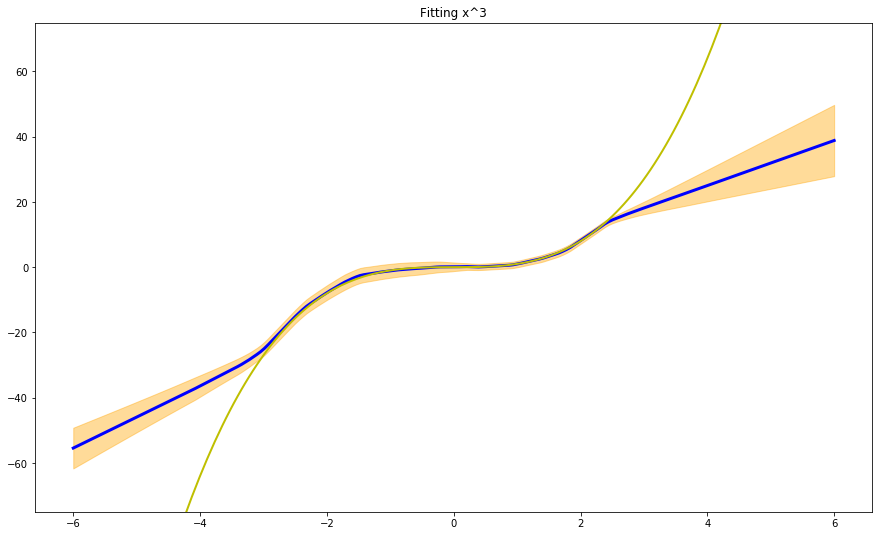

In [328]:
# Plot test with multiple networks

x_ax = np.linspace(-6, 6, num=200)
preds, sigmas = [], []
for j in range(len(x_ax)):
    
    mu_sigma = [(prediction_fns[i]([[np.array([x_ax[j]])]])[0][0][0], \
                prediction_fns[i]([[np.array([x_ax[j]])]])[1][0][0]) \
                for i in range(len(prediction_fns))]
    out_mus = [i for i,j in mu_sigma]
    out_mu = np.mean(out_mus)
    out_sigmas = [j for i,j in mu_sigma]
    out_sigma = np.sqrt(np.mean(out_sigmas + np.square(out_mus)) - np.square(out_mu))

    preds.append(out_mu.reshape(1,)[0])
    sigmas.append(out_sigma.reshape(1,)[0])

plt.figure(1, figsize=(15, 9))
plt.plot([i for i in x_ax], [i for i in preds], 'b', linewidth=3)
upper = [i+k for i,k in zip(preds, sigmas)]
lower = [i-k for i,k in zip(preds, sigmas)]

# plt.plot([i for i in x_ax], [i for i in upper], 'r', linewidth = 3)
# plt.plot([i for i in x_ax], [i for i in lower], 'r', linewidth = 3)
plt.fill_between(x_ax, upper, lower, color="orange", alpha=0.4)
plt.plot([i for i in x_ax], [pow_fun(i) for i in x_ax], 'y', linewidth = 2)
plt.ylim(-75, 75)
plt.title('Fitting x^3')

In [336]:
# Adversarial exploration
inputs = Input(shape=(1,))
outputs = Input(shape=(1,))
x = Dense(10, activation='relu')(inputs)
x = Dense(6, activation='relu')(x)
x = Dense(30, activation='relu')(x)
mu, sigma = GaussianLayer(1, name='main_output')(x)

model = Model(inputs, mu)
model.compile(loss=custom_loss(sigma), optimizer='adam')
model.fit(train_x, train_y, epochs=400)

def gaussian_loss(y_true, y_pred, sigma):
    """
    Util function used to derive gradients w.r.t. to input data (for adversarial examples generation)
    """
    return tf.reduce_mean(0.5*tf.log(sigma) + 0.5*tf.div(tf.square(y_true - y_pred), sigma)) + 1e-6

loss_calc = gaussian_nll(outputs, mu, sigma)
loss_gradients = tf.gradients(loss_calc, inputs)
gr_sign = tf.sign(loss_gradients)
adversarial_input_data = tf.add(inputs, 0.2 * gr_sign)

sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)
adversarial_input_data = sess.run([adversarial_input_data], feed_dict={inputs: train_x, outputs: train_y})[0]

augmented_train_x = np.concatenate([train_x, adversarial_input_data.reshape(train_x.shape[0], 1)])
augmented_train_y = np.concatenate([train_y, train_y])
model.fit(augmented_train_x, augmented_train_y, epochs=400)

get_intermediate = K.function(inputs=[model.input], outputs=model.get_layer(layer_name).output)

Epoch 1/400


KeyboardInterrupt: 

In [337]:
# Multiple networks with adversarial examples

def create_trained_network_with_adv(train_x, train_y):
    inputs = Input(shape=(1,))
    outputs = Input(shape=(1,))
    x = Dense(10, activation='relu')(inputs)
    x = Dense(6, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    mu, sigma = GaussianLayer(1, name='main_output')(x)

    model = Model(inputs, mu)
    model.compile(loss=custom_loss(sigma), optimizer='adam')
    model.fit(train_x, train_y, epochs=400, verbose=0)

    def gaussian_loss(y_true, y_pred, sigma):
        """
        Util function used to derive gradients w.r.t. to input data (for adversarial examples generation)
        """
        return tf.reduce_mean(0.5*tf.log(sigma) + 0.5*tf.div(tf.square(y_true - y_pred), sigma)) + 1e-6

    loss_calc = gaussian_nll(outputs, mu, sigma)
    loss_gradients = tf.gradients(loss_calc, inputs)
    gr_sign = tf.sign(loss_gradients)
    adversarial_input_data = tf.add(inputs, 0.4 * gr_sign)

    sess = tf.Session()
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    adversarial_input_data = sess.run([adversarial_input_data], feed_dict={inputs: train_x, outputs: train_y})[0]

    augmented_train_x = np.concatenate([train_x, adversarial_input_data.reshape(train_x.shape[0], 1)])
    augmented_train_y = np.concatenate([train_y, train_y])
    model.fit(augmented_train_x, augmented_train_y, epochs=400, verbose=0)

    get_intermediate = K.function(inputs=[model.input], outputs=model.get_layer(layer_name).output)
    return get_intermediate

prediction_fns_adv = []
for i in range(10):
    print(i)
    prediction_fns_adv.append(create_trained_network_with_adv(train_x, train_y))

0
1
2
3
4
5
6
7
8
9


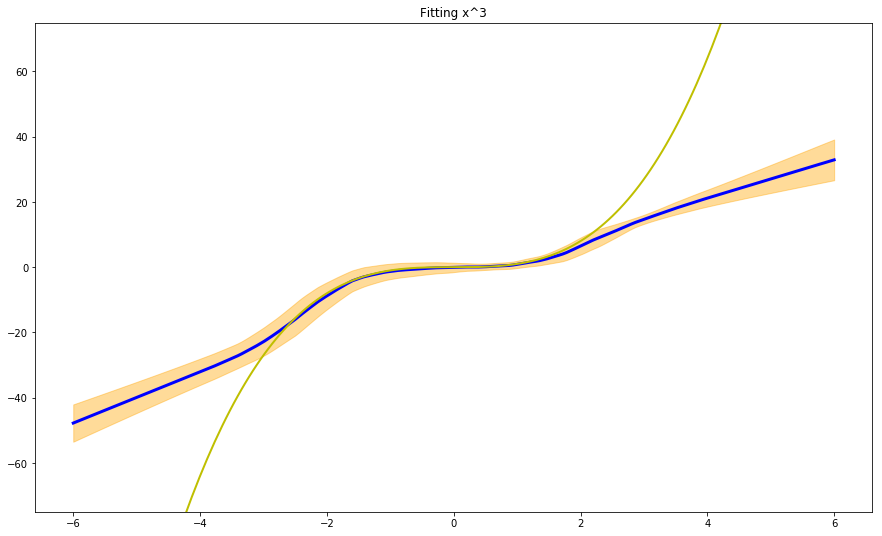

In [338]:
# Plot test with multiple networks

x_ax = np.linspace(-6, 6, num=200)
preds, sigmas = [], []
for j in range(len(x_ax)):
    
    mu_sigma = [(prediction_fns_adv[i]([[np.array([x_ax[j]])]])[0][0][0], \
                prediction_fns_adv[i]([[np.array([x_ax[j]])]])[1][0][0]) \
                for i in range(len(prediction_fns))]
    out_mus = [i for i,j in mu_sigma]
    out_mu = np.mean(out_mus)
    out_sigmas = [j for i,j in mu_sigma]
    out_sigma = np.sqrt(np.mean(out_sigmas + np.square(out_mus)) - np.square(out_mu))

    preds.append(out_mu.reshape(1,)[0])
    sigmas.append(out_sigma.reshape(1,)[0])

plt.figure(1, figsize=(15, 9))
plt.plot([i for i in x_ax], [i for i in preds], 'b', linewidth=3)
upper = [i+k for i,k in zip(preds, sigmas)]
lower = [i-k for i,k in zip(preds, sigmas)]

plt.fill_between(x_ax, upper, lower, color="orange", alpha=0.4)
plt.plot([i for i in x_ax], [pow_fun(i) for i in x_ax], 'y', linewidth = 2)
plt.ylim(-75, 75)
plt.title('Fitting x^3')

In [335]:
train_x

array([[-3.   ],
       [-2.995],
       [-2.99 ],
       ...,
       [ 2.385],
       [ 2.39 ],
       [ 2.395]])